#Importing Libraries


In [1]:
#importing libraries
import numpy as np
import pandas as pd

#Importing Training Dataset

In [2]:
data = pd.read_csv('/content/FinalDatasetmerged.csv',encoding=('utf8'))
data.head()

,content,sentiment_labels
0,feature search hotspot location able function ...,-1.0
1,good,2.0
2,easy scan,2.0
3,good lindungi diri lindungi semua,2.0
4,Extremely happy with the experience. They deli...,2.0


In [3]:
data.shape


(32193, 2)

In [4]:
data['sentiment_labels'].value_counts()

 2.0    17135
-1.0    10007
 1.0     5047
Name: sentiment_labels, dtype: int64

In [5]:
data.isnull().sum()

content             6
sentiment_labels    4
dtype: int64

#Data Preprocessing

In [6]:
data = data.dropna()
print(data)

                                                 content  sentiment_labels
0      feature search hotspot location able function ...              -1.0
1                                                   good               2.0
2                                              easy scan               2.0
3                      good lindungi diri lindungi semua               2.0
4      Extremely happy with the experience. They deli...               2.0
...                                                  ...               ...
32188  Not happy with the quality of the product rece...              -1.0
32189  This app is totally bad don't order from here ...              -1.0
32190                                               good               2.0
32191       today app crashing badly event open scanning              -1.0
32192  I had an awfull experience. I ordered for a fe...              -1.0

[32183 rows x 2 columns]


In [7]:
data.shape

(32183, 2)

##Removing the punctuations


In [8]:
#library that contains punctuation
import string
string.punctuation
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
#storing the puntuation free text
data['content']= data['content'].apply(lambda x:remove_punctuation(x))
data.head()


,content,sentiment_labels
0,feature search hotspot location able function ...,-1.0
1,good,2.0
2,easy scan,2.0
3,good lindungi diri lindungi semua,2.0
4,Extremely happy with the experience They deliv...,2.0


##Lowering the content

In [9]:
data['content']= data['content'].apply(lambda x: x.lower())
data.head()

,content,sentiment_labels
0,feature search hotspot location able function ...,-1.0
1,good,2.0
2,easy scan,2.0
3,good lindungi diri lindungi semua,2.0
4,extremely happy with the experience they deliv...,2.0


##Tokenization

In [10]:
# #defining function for tokenization
import nltk
nltk.download('punkt')
data["content"] = data["content"].apply(nltk.word_tokenize)
data.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,content,sentiment_labels
0,"[feature, search, hotspot, location, able, fun...",-1.0
1,[good],2.0
2,"[easy, scan]",2.0
3,"[good, lindungi, diri, lindungi, semua]",2.0
4,"[extremely, happy, with, the, experience, they...",2.0


In [11]:
token_count= data['content'].str.len()
token_count


0        15
1         1
2         2
3         5
4        25
         ..
32188    21
32189    33
32190     1
32191     7
32192    50
Name: content, Length: 32183, dtype: int64

##Stop words Removal

In [12]:
#importing nlp library
import nltk
nltk.download('stopwords')
#Stop words present in the library
stopwords = nltk.corpus.stopwords.words('english')
stopwords.remove("not")
stopwords.remove("nor")
stopwords.remove("no")
stopwords.remove("aren't")
stopwords.remove("couldn't")
stopwords.remove("didn't")
stopwords.remove("doesn't")
stopwords.remove("hadn't")
stopwords.remove("hasn't")
stopwords.remove("shouldn't")
stopwords.remove("isn't")
#defining the function to remove stopwords from tokenized text
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output
#applying the function
data['content']= data['content'].apply(lambda x:remove_stopwords(x))
data.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,content,sentiment_labels
0,"[feature, search, hotspot, location, able, fun...",-1.0
1,[good],2.0
2,"[easy, scan]",2.0
3,"[good, lindungi, diri, lindungi, semua]",2.0
4,"[extremely, happy, experience, deliver, early,...",2.0


##Lemmatization

In [13]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()

#defining the function for lemmatization
def lemmatizer(text):
  lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
  return lemm_text
data['content']=data['content'].apply(lambda x:lemmatizer(x))
data.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,content,sentiment_labels
0,"[feature, search, hotspot, location, able, fun...",-1.0
1,[good],2.0
2,"[easy, scan]",2.0
3,"[good, lindungi, diri, lindungi, semua]",2.0
4,"[extremely, happy, experience, deliver, early,...",2.0


Unlist

In [14]:
data['content'] = data['content'].apply(lambda x: " ".join(x))

In [15]:
data

,content,sentiment_labels
0,feature search hotspot location able function ...,-1.0
1,good,2.0
2,easy scan,2.0
3,good lindungi diri lindungi semua,2.0
4,extremely happy experience deliver early quick...,2.0
...,...,...
32188,not happy quality product received damaged n n...,-1.0
32189,app totally bad dont order got item without se...,-1.0
32190,good,2.0
32191,today app crashing badly event open scanning,-1.0


##Defining the X and y variable

In [16]:
X= data['content']
y= data['sentiment_labels']

In [17]:
X

0        feature search hotspot location able function ...
1                                                     good
2                                                easy scan
3                        good lindungi diri lindungi semua
4        extremely happy experience deliver early quick...
                               ...                        
32188    not happy quality product received damaged n n...
32189    app totally bad dont order got item without se...
32190                                                 good
32191         today app crashing badly event open scanning
32192    awfull experience ordered product didnt receiv...
Name: content, Length: 32183, dtype: object

In [18]:
y

0       -1.0
1        2.0
2        2.0
3        2.0
4        2.0
        ... 
32188   -1.0
32189   -1.0
32190    2.0
32191   -1.0
32192   -1.0
Name: sentiment_labels, Length: 32183, dtype: float64

##Representing Text in Numeric Form(Vectorization)

In [19]:
# nltk.download('stopwords')
# from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer (max_features=1000)
X = vectorizer.fit_transform(X).toarray()

In [20]:
X

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.18028582, 0.        ,
        0.        ]])

In [21]:
y

0       -1.0
1        2.0
2        2.0
3        2.0
4        2.0
        ... 
32188   -1.0
32189   -1.0
32190    2.0
32191   -1.0
32192   -1.0
Name: sentiment_labels, Length: 32183, dtype: float64

#Splitting the dataset into Train and Test Sets

In [22]:
#splitting into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state = 0)

In [23]:
X_train.shape

(25746, 1000)

In [24]:
X_train


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [25]:
X_test


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [26]:
y_train


22861   -1.0
18542    2.0
16781    1.0
18650   -1.0
14346    1.0
        ... 
13127    2.0
19653   -1.0
9849    -1.0
10803   -1.0
2734     2.0
Name: sentiment_labels, Length: 25746, dtype: float64

In [27]:
y_test

26641    2.0
10511    2.0
18453    2.0
12365    2.0
2654     2.0
        ... 
561     -1.0
1250    -1.0
22785   -1.0
24510    2.0
23486   -1.0
Name: sentiment_labels, Length: 6437, dtype: float64

In [28]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((25746, 1000), (6437, 1000), (25746,), (6437,))

#Building and Testing the Model 

In [29]:
#Random Forest(RF)
from sklearn.ensemble import RandomForestClassifier
classifier_rf=RandomForestClassifier(random_state=1)
classifier_rf.fit(X_train,y_train)
print('Train Accuracy of RF:',classifier_rf.score(X_train,y_train))
from sklearn.metrics import accuracy_score
y_test_predicted_rf= classifier_rf.predict(X_test)
print('Test accuracy of RF:',accuracy_score(y_test,y_test_predicted_rf))


#Decision Tree(DT)
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(random_state=2)
classifier_dt .fit(X_train, y_train)
print('Train Accuracy of DT:',classifier_dt .score(X_train,y_train))
from sklearn.metrics import accuracy_score
y_test_predicted_dt  = classifier_dt .predict(X_test)
print('Test accuracy of DT:',accuracy_score(y_test,y_test_predicted_dt ))


#K-Nearest Neighbors(KNN)
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier()
classifier_knn.fit(X_train, y_train)
print('Train Accuracy of KNN:',classifier_knn.score(X_train,y_train))
from sklearn.metrics import accuracy_score
y_test_predicted_knn = classifier_knn.predict(X_test)
print('Test accuracy of KNN:',accuracy_score(y_test,y_test_predicted_knn))

#Multinomial Regression(MR)
from sklearn.linear_model import LogisticRegression
classifier_mr = LogisticRegression(random_state=4)
classifier_mr.fit(X_train, y_train)
print('Train Accuracy of MR:',classifier_mr.score(X_train,y_train))
from sklearn.metrics import accuracy_score
y_test_predicted_mr = classifier_mr.predict(X_test)
print('Test accuracy of MR:',accuracy_score(y_test,y_test_predicted_mr))



Train Accuracy of RF: 0.9799192107511846
Test accuracy of RF: 0.9226347677489514
Train Accuracy of DT: 0.9799192107511846
Test accuracy of DT: 0.9036818393661643
Train Accuracy of KNN: 0.8564437194127243
Test accuracy of KNN: 0.7882553984775517
Train Accuracy of MR: 0.9283383826613842
Test accuracy of MR: 0.9203044896691005


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


#Hyperparameter tuning using GridSearchCV

# **Random Forest (RF)**

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
#Define the hyperparameter configuration space
rf_params = {
    'n_estimators': [100,800],
    'max_depth': [None],
    'min_samples_leaf': [1,20],
    'criterion':['gini'],
    'max_features':['sqrt'],
    'max_leaf_nodes':[None],
    'min_samples_split':[2,20],
    'n_jobs':[None],
    'bootstrap':[True],
    'class_weight':[None],
    'max_samples':[None]

}
clf_rf = RandomForestClassifier()
grid_rf= GridSearchCV(clf_rf, rf_params, cv=3, scoring='accuracy')
grid_result_rf= grid_rf.fit(X_train, y_train)
best_random_grid_rf=grid_result_rf.best_estimator_
print('Train Accuracy :',grid_rf.best_estimator_.score(X_train, y_train))

#prediction
y_pred_rf=best_random_grid_rf.predict(X_test)
print('Best Parameters: ', grid_result_rf.best_params_)
print('Best Accuracy Through Grid Search :', grid_result_rf.best_score_)      #The best_score is the best score produced on the test folds from your training data
print("Test Accuracy {}".format(accuracy_score(y_test,y_pred_rf)))          #can use this also....print('Test Accuracy : ',grid.best_estimator_.score(X_test, y_test))


Train Accuracy : 0.9723452186747455
Best Parameters:  {'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_samples_leaf': 1, 'min_samples_split': 20, 'n_estimators': 800, 'n_jobs': None}
Best Accuracy Through Grid Search : 0.9168026101141925
Test Accuracy 0.9255864533167625


# **Decision Tree (DT)**

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
#Define the hyperparameter configuration space
dt_params = {
    'max_features': [None],
    'max_depth': [None],
    'min_samples_leaf': [1,8,20],
    'criterion':['gini'],
    'splitter' : ['best'],
    'min_samples_split': [2,30,70],
    'max_leaf_nodes':[None],
    'class_weight':[None]
}
clf_dt =DecisionTreeClassifier()
grid_dt = GridSearchCV(clf_dt, dt_params, cv=3, scoring='accuracy')
grid_result_dt= grid_dt.fit(X_train, y_train)
best_random_grid_dt=grid_result_dt.best_estimator_
print('Train Accuracy :',grid_dt.best_estimator_.score(X_train, y_train))

#prediction
from sklearn.metrics import accuracy_score
y_pred_dt=best_random_grid_dt.predict(X_test)
print('Best Params: ', grid_result_dt.best_params_)
print('Best Accuracy Through Grid Search: ', grid_result_dt.best_score_)  #The best_score is the best score produced on the test folds from your training data
print("Test Accuracy {}".format(accuracy_score(y_test,y_pred_dt)))   #can use this also....print('Test Accuracy : ',grid.best_estimator_.score(X_test, y_test))

# print("Classification report: {}".format(classification_report(y_test,y_pred_dt)))          
# print(confusion_matrix(y_test,y_pred_dt))

Train Accuracy : 0.9624407674978638
Best Params:  {'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 30, 'splitter': 'best'}
Best Accuracy Through Grid Search:  0.9003728734560709
Test Accuracy 0.9067888768059655


# **K-Nearest Neighbors (KNN)**

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
#Define the hyperparameter configuration space
knn_params = {
    'n_neighbors': [5,150],
    'weights': ['uniform'],
    'leaf_size': [5,30,100],
    'algorithm': ['auto'],
    'n_jobs':[None]

}
clf_knn = KNeighborsClassifier()
grid_knn = GridSearchCV(clf_knn, knn_params, cv=3, scoring='accuracy')
grid_result_knn= grid_knn.fit(X_train, y_train)
best_random_grid_knn=grid_result_knn.best_estimator_
print('Train Accuracy :',grid_knn.best_estimator_.score(X_train, y_train))

#prediction
y_pred_knn=best_random_grid_knn.predict(X_test)
print('Best Params: ', grid_result_knn.best_params_)
print('Best Accuracy Through Grid Search: ', grid_result_knn.best_score_)    #The best_score is the best score produced on the test folds from your training data
print("Test Accuracy {}".format(accuracy_score(y_test,y_pred_knn)))      #can use this also....print('Test Accuracy : ',grid.best_estimator_.score(X_test, y_test))

# print("Classification report: {}".format(classification_report(y_test,y_pred_knn)))
# print(confusion_matrix(y_test,y_pred_knn))


Train Accuracy : 0.8564437194127243
Best Params:  {'algorithm': 'auto', 'leaf_size': 5, 'n_jobs': None, 'n_neighbors': 5, 'weights': 'uniform'}
Best Accuracy Through Grid Search:  0.776431290297522
Test Accuracy 0.7882553984775517


# **Multinomial Regression (MR)**



In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
#Define the hyperparameter configuration space
mr_params = {
    'multi_class':['multinomial'],
    'solver':['newton-cg'],
    'C':[1,50],       #Inverse of regularization strength;  smaller values specify stronger regularization.
    'max_iter':[100,300],
    'class_weight':[None],

}
clf_mr = LogisticRegression()
grid_mr = GridSearchCV(clf_mr, mr_params, cv=3, scoring='accuracy')
grid_result_mr= grid_mr.fit(X_train, y_train)
best_random_grid_mr=grid_result_mr.best_estimator_
print('Train Accuracy :',grid_mr.best_estimator_.score(X_train, y_train))

# #prediction
y_pred_mr=best_random_grid_mr.predict(X_test)
print('Best Params: ', grid_result_mr.best_params_)
print('Best Accuracy Through Grid Search: ', grid_result_mr.best_score_)     #The best_score is the best score produced on the test folds from your training data
print("Test Accuracy {}".format(accuracy_score(y_test,y_pred_mr)))    #can use this also....print('Test Accuracy : ',grid.best_estimator_.score(X_test, y_test))

# print("Classification report: {}".format(classification_report(y_test,y_pred_mr)))
# print(confusion_matrix(y_test,y_pred_mr)) 


Train Accuracy : 0.9283383826613842
Best Params:  {'C': 1, 'class_weight': None, 'max_iter': 100, 'multi_class': 'multinomial', 'solver': 'newton-cg'}
Best Accuracy Through Grid Search:  0.9152489707138973
Test Accuracy 0.9203044896691005


#Best Model - Random Forest (RF)

##Confusion matrix

In [34]:
#confusion matrix of RF
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_rf)
print(cm) 

[[1890    6   88]
 [  75  797  118]
 [ 118   74 3271]]


[Text(0, 0.5, 'NEGATIVE'), Text(0, 1.5, 'NEUTRAL'), Text(0, 2.5, 'POSITIVE')]

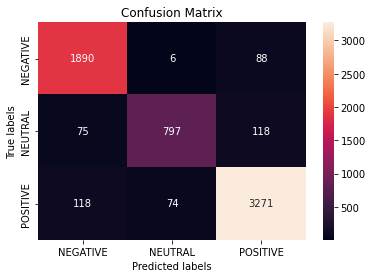

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = plt.subplot()
sns.heatmap(cm,annot=True, fmt='g',ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['NEGATIVE','NEUTRAL', 'POSITIVE'])
ax.yaxis.set_ticklabels(['NEGATIVE','NEUTRAL', 'POSITIVE'])

In [36]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

        -1.0       0.91      0.95      0.93      1984
         1.0       0.91      0.81      0.85       990
         2.0       0.94      0.94      0.94      3463

    accuracy                           0.93      6437
   macro avg       0.92      0.90      0.91      6437
weighted avg       0.93      0.93      0.92      6437



#For other models

In [37]:
print(metrics.classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

        -1.0       0.91      0.92      0.91      1984
         1.0       0.83      0.81      0.82       990
         2.0       0.93      0.93      0.93      3463

    accuracy                           0.91      6437
   macro avg       0.89      0.88      0.89      6437
weighted avg       0.91      0.91      0.91      6437



In [38]:
print(metrics.classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

        -1.0       0.86      0.60      0.70      1984
         1.0       0.62      0.78      0.69       990
         2.0       0.82      0.90      0.86      3463

    accuracy                           0.79      6437
   macro avg       0.77      0.76      0.75      6437
weighted avg       0.80      0.79      0.78      6437



In [39]:
print(metrics.classification_report(y_test,y_pred_mr))

              precision    recall  f1-score   support

        -1.0       0.92      0.94      0.93      1984
         1.0       0.91      0.77      0.83       990
         2.0       0.92      0.95      0.94      3463

    accuracy                           0.92      6437
   macro avg       0.92      0.89      0.90      6437
weighted avg       0.92      0.92      0.92      6437



##Prediction

In [40]:
df=pd.read_csv('/content/nz_review_clened.csv',encoding=('utf8'))
df.head()

,Date,Content,Rating,Version
0,1/10/2022,Waste of time,1,6.0.0
1,1/10/2022,Won't let me update or scan most QR codes,1,6.0.0
2,1/10/2022,Does what is expected.,5,6.1.0
3,1/10/2022,App is super helpful and anyone that says othe...,5,6.1.0
4,1/10/2022,It's ok. The only thing I find annoying is it ...,4,6.1.0


In [41]:
df.shape

(4133, 4)

#Data Preprocessing

In [42]:
#library that contains punctuation
import string
string.punctuation
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
#storing the puntuation free text
df['Content']= df['Content'].apply(lambda x:remove_punctuation(x))

#Lower the content
df['Content']= df['Content'].apply(lambda x: x.lower())

# #defining function for tokenization
import nltk
df["Content"] = df["Content"].apply(nltk.word_tokenize)

#Stop words Removal
#importing nlp library
import nltk
#Stop words present in the library
stopwords = nltk.corpus.stopwords.words('english')
stopwords.remove("not")
stopwords.remove("nor")
stopwords.remove("no")
stopwords.remove("aren't")
stopwords.remove("couldn't")
stopwords.remove("didn't")
stopwords.remove("doesn't")
stopwords.remove("hadn't")
stopwords.remove("hasn't")
stopwords.remove("shouldn't")
stopwords.remove("isn't")
#defining the function to remove stopwords from tokenized text
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output
#applying the function
df['Content']= df['Content'].apply(lambda x:remove_stopwords(x))

#Lemmatization
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()

#defining the function for lemmatization
def lemmatizer(text):
  lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
  return lemm_text
df['Content']=df['Content'].apply(lambda x:lemmatizer(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Unlist

In [43]:
df['Content'] = df['Content'].apply(lambda x: " ".join(x))
df

,Date,Content,Rating,Version
0,1/10/2022,waste time,1,6.0.0
1,1/10/2022,wont let update scan qr code,1,6.0.0
2,1/10/2022,expected,5,6.1.0
3,1/10/2022,app super helpful anyone say otherwise little ...,5,6.1.0
4,1/10/2022,ok thing find annoying doesnt keep record plac...,4,6.1.0
...,...,...,...,...
4128,7/21/2020,app excellent easy use feel assured recording ...,5,1.1.0
4129,7/20/2020,great could go add location forgot scan ie mor...,4,1.1.0
4130,7/16/2020,app bit shonky no longer allows update detail ...,1,1.1.0
4131,7/15/2020,donât know many time iâve tried scan somet...,1,1.1.0


##Added new column and Defined the X,y variable 

In [44]:
df["sentiment_labels"]=' '
X_predict= df['Content']
y= df['sentiment_labels']
df

,Date,Content,Rating,Version,sentiment_labels
0,1/10/2022,waste time,1,6.0.0,
1,1/10/2022,wont let update scan qr code,1,6.0.0,
2,1/10/2022,expected,5,6.1.0,
3,1/10/2022,app super helpful anyone say otherwise little ...,5,6.1.0,
4,1/10/2022,ok thing find annoying doesnt keep record plac...,4,6.1.0,
...,...,...,...,...,...
4128,7/21/2020,app excellent easy use feel assured recording ...,5,1.1.0,
4129,7/20/2020,great could go add location forgot scan ie mor...,4,1.1.0,
4130,7/16/2020,app bit shonky no longer allows update detail ...,1,1.1.0,
4131,7/15/2020,donât know many time iâve tried scan somet...,1,1.1.0,


In [45]:
X = vectorizer.transform(X_predict).toarray()


In [46]:
X.shape

(4133, 1000)

In [47]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [48]:
 new_output = grid_rf.predict(X)

In [49]:
new_output

array([-1., -1.,  2., ..., -1.,  2., -1.])

In [50]:
# new_output = np.array(new_output)
# new_output

In [51]:
df['sentiment_labels'] = new_output.tolist()
df

,Date,Content,Rating,Version,sentiment_labels
0,1/10/2022,waste time,1,6.0.0,-1.0
1,1/10/2022,wont let update scan qr code,1,6.0.0,-1.0
2,1/10/2022,expected,5,6.1.0,2.0
3,1/10/2022,app super helpful anyone say otherwise little ...,5,6.1.0,2.0
4,1/10/2022,ok thing find annoying doesnt keep record plac...,4,6.1.0,1.0
...,...,...,...,...,...
4128,7/21/2020,app excellent easy use feel assured recording ...,5,1.1.0,2.0
4129,7/20/2020,great could go add location forgot scan ie mor...,4,1.1.0,2.0
4130,7/16/2020,app bit shonky no longer allows update detail ...,1,1.1.0,-1.0
4131,7/15/2020,donât know many time iâve tried scan somet...,1,1.1.0,2.0


In [52]:
# convert -1,1,2 Sentiments to positive,neutral and negative
def convert_sentiment_labels(sentiment):
    if  sentiment == 2:
        return 'POSITIVE'
    elif sentiment == 1 :
        return 'NEUTRAL'
    elif sentiment == -1:
        return 'NEGATIVE'

# Apply convert_Sentiment function
df['sentiment_labels']= df.sentiment_labels.apply(lambda x : convert_sentiment_labels(x))

In [53]:
df['sentiment_labels'].value_counts()

NEGATIVE    2598
POSITIVE    1406
NEUTRAL      129
Name: sentiment_labels, dtype: int64

In [54]:
# convert ratings to positive, negative, neutral
def convert_Rating(Rating):
    if  Rating == 5 :    
        return 'POSITIVE'
    if  Rating == 4 :    
        return 'POSITIVE'
    elif Rating ==  3 :
        return 'NEUTRAL'
    elif Rating == 2 :
        return 'NEGATIVE'
    elif Rating == 1 :
        return 'NEGATIVE'

# Apply convert_Sentiment function
df['Rating_converted']= df.Rating.apply(lambda x : convert_Rating(x))

In [55]:
df

,Date,Content,Rating,Version,sentiment_labels,Rating_converted
0,1/10/2022,waste time,1,6.0.0,NEGATIVE,NEGATIVE
1,1/10/2022,wont let update scan qr code,1,6.0.0,NEGATIVE,NEGATIVE
2,1/10/2022,expected,5,6.1.0,POSITIVE,POSITIVE
3,1/10/2022,app super helpful anyone say otherwise little ...,5,6.1.0,POSITIVE,POSITIVE
4,1/10/2022,ok thing find annoying doesnt keep record plac...,4,6.1.0,NEUTRAL,POSITIVE
...,...,...,...,...,...,...
4128,7/21/2020,app excellent easy use feel assured recording ...,5,1.1.0,POSITIVE,POSITIVE
4129,7/20/2020,great could go add location forgot scan ie mor...,4,1.1.0,POSITIVE,POSITIVE
4130,7/16/2020,app bit shonky no longer allows update detail ...,1,1.1.0,NEGATIVE,NEGATIVE
4131,7/15/2020,donât know many time iâve tried scan somet...,1,1.1.0,POSITIVE,NEGATIVE


In [56]:
df['check'] = np.where(df["sentiment_labels"] == df["Rating_converted"], True, False)

In [57]:
df

,Date,Content,Rating,Version,sentiment_labels,Rating_converted,check
0,1/10/2022,waste time,1,6.0.0,NEGATIVE,NEGATIVE,True
1,1/10/2022,wont let update scan qr code,1,6.0.0,NEGATIVE,NEGATIVE,True
2,1/10/2022,expected,5,6.1.0,POSITIVE,POSITIVE,True
3,1/10/2022,app super helpful anyone say otherwise little ...,5,6.1.0,POSITIVE,POSITIVE,True
4,1/10/2022,ok thing find annoying doesnt keep record plac...,4,6.1.0,NEUTRAL,POSITIVE,False
...,...,...,...,...,...,...,...
4128,7/21/2020,app excellent easy use feel assured recording ...,5,1.1.0,POSITIVE,POSITIVE,True
4129,7/20/2020,great could go add location forgot scan ie mor...,4,1.1.0,POSITIVE,POSITIVE,True
4130,7/16/2020,app bit shonky no longer allows update detail ...,1,1.1.0,NEGATIVE,NEGATIVE,True
4131,7/15/2020,donât know many time iâve tried scan somet...,1,1.1.0,POSITIVE,NEGATIVE,False


In [58]:
df['check'].value_counts()

True     2871
False    1262
Name: check, dtype: int64

In [59]:
df['check'].value_counts(normalize=True) 

True     0.694653
False    0.305347
Name: check, dtype: float64

In [60]:
df.to_csv ('/content/predicted_Sentiments.csv')